In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub 

In [2]:
from kagglehub import KaggleDatasetAdapter

In [3]:
# this thing imports datasets from kaggle as pandas dataframes
df = kagglehub.dataset_load(KaggleDatasetAdapter.PANDAS,
handle='zahidmughal2343/video-games-sale',
path='video games sales.csv'                             
)

In [4]:
df = df.drop('Rank', axis=1)

In [5]:
df.head()

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [7]:
columns = ['Name', 'Year', 'Platform', 'Global_Sales']

edited_df = df[columns]

In [8]:
edited_df = edited_df.dropna()

In [9]:
edited_df['Year'] = edited_df['Year'].astype(int)

In [17]:
edited_df

,Name,Year,Platform,Global_Sales
0,Wii Sports,2006,Wii,82.74
1,Super Mario Bros.,1985,NES,40.24
2,Mario Kart Wii,2008,Wii,35.82
3,Wii Sports Resort,2009,Wii,33.00
4,Pokemon Red/Pokemon Blue,1996,GB,31.37
...,...,...,...,...
16593,Woody Woodpecker in Crazy Castle 5,2002,GBA,0.01
16594,Men in Black II: Alien Escape,2003,GC,0.01
16595,SCORE International Baja 1000: The Official Game,2008,PS2,0.01
16596,Know How 2,2010,DS,0.01


In [18]:
sales_by_year = edited_df.groupby(['Year'], as_index=False).agg({'Global_Sales': 'sum'})

In [30]:
sales_by_year.head()

,Year,Global_Sales
0,1980,11.38
1,1981,35.77
2,1982,28.86
3,1983,16.79
4,1984,50.36


In [40]:
sales_by_year['Year'] = sales_by_year['Year'].astype(str)

Text(0.0, 1.05, 'Video games sales trend over the years')

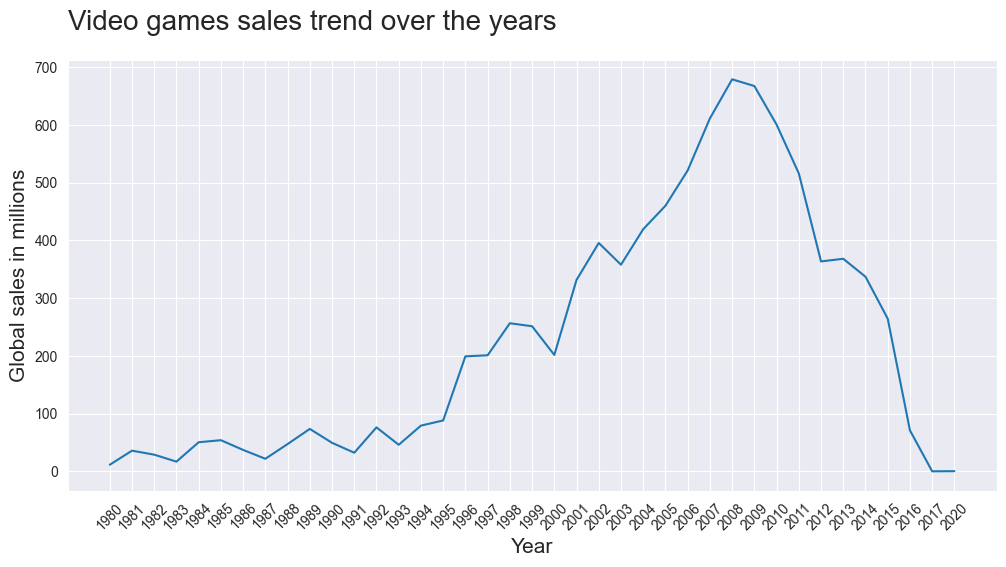

In [51]:
sns.set_style('darkgrid')
plt.figure(figsize=(10,5))
plt.xticks(rotation=45)
plt.tight_layout()
sns.lineplot(sales_by_year, x='Year', y='Global_Sales')

# here is some other customization options
plt.xlabel('Year', size = 15)
plt.ylabel('Global sales in millions', size = 15)
plt.title('Video games sales trend over the years', size=20, y=1.05, loc='left')

In [62]:
columns2 = ['Year', 'Genre', 'Global_Sales']

df_sales_genre = df[columns2]
df_sales_genre.isna().any()
df_sales_genre = df_sales_genre.dropna()
df_sales_genre['Year'] = df_sales_genre['Year'].astype(int).astype(str)
df_sales_genre = df_sales_genre.groupby(['Year', 'Genre'], as_index=False).agg({'Global_Sales': 'sum'})

In [ ]:
df_sales_genre

,Year,Genre,Global_Sales
0,1980,Action,0.34
1,1980,Fighting,0.77
2,1980,Misc,2.71
3,1980,Shooter,7.07
4,1980,Sports,0.49
...,...,...,...
384,2016,Sports,14.60
385,2016,Strategy,0.50
386,2017,Action,0.01
387,2017,Role-Playing,0.04


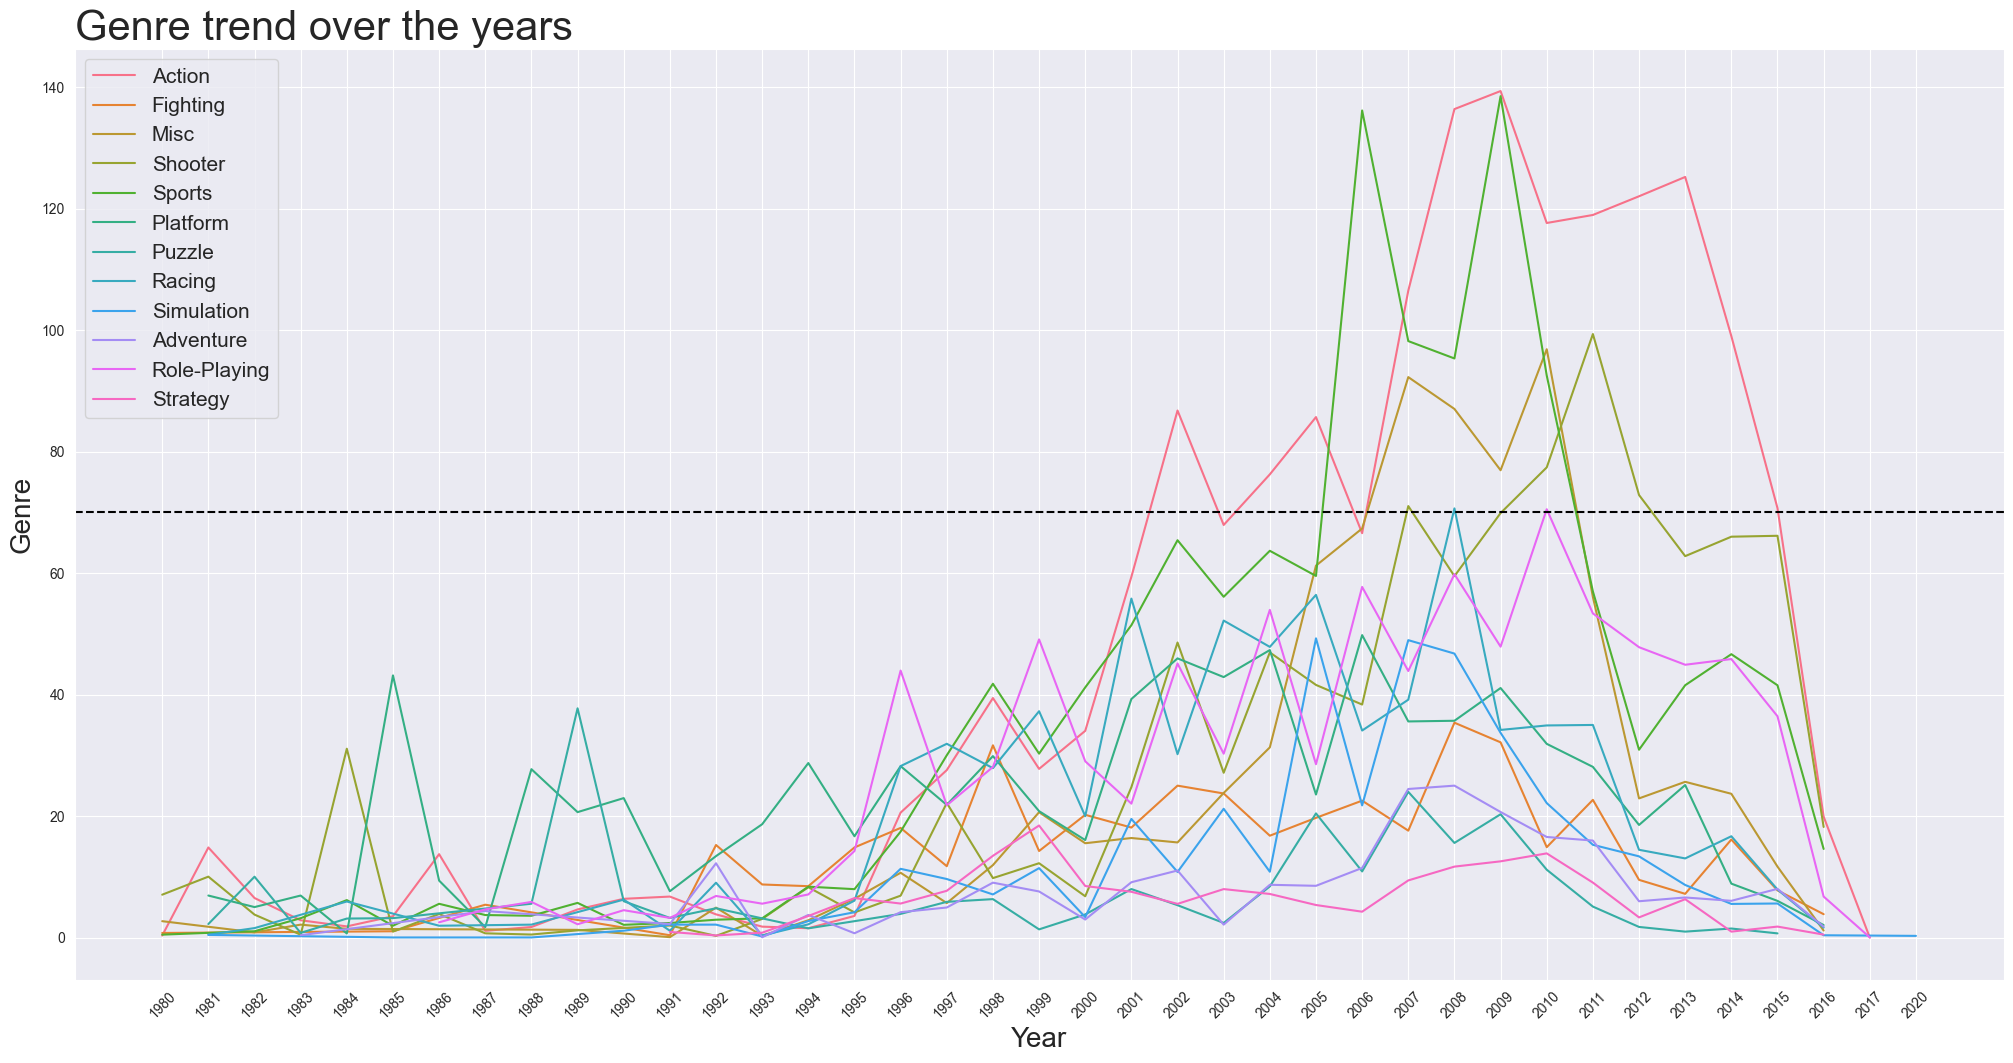

In [82]:
plt.figure(figsize=(20,10))
plt.xticks(rotation=45)
plt.tight_layout()
sns.lineplot(df_sales_genre, x='Year', y='Global_Sales', hue='Genre')
plt.title('Genre trend over the years', size=30, loc='left')
plt.xlabel('Year', size=20)
plt.ylabel('Genre', size=20)

# custom legend
plt.legend(fontsize=15, loc='upper left')

# custom line 
plt.axhline(y=70, color = 'black', linestyle='--')

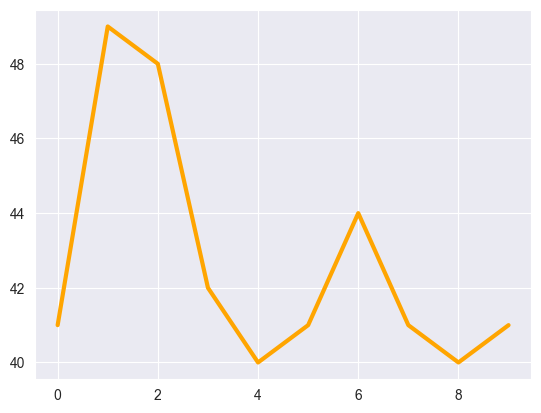

In [87]:
import numpy as np

x = np.random.randint(low=40, high=50, size=10)

plt.plot(x, color='orange', linewidth=3)

In [88]:
x

array([41, 49, 48, 42, 40, 41, 44, 41, 40, 41])